## Прикладная статистика в машинном обучении

### Домашнее задание \#2: EM-алгоритм. Линейная регрессия.

- Домашнее задание оценивается в 10 баллов.


- Решения принимаются до **1 декабря 2020 года**, 23:59 МСК включительно.
Работы, отправленные после дедлайна, оцениваются следующим образом:
    - До 7:00 МСК 2 октября: максимум 8 баллов.
    - До 23:59 МСК 2 октября: максимум 7 баллов.
    - До 23:59 МСК 3 октября: максимум 6 баллов.
    
    
- Работы, отправленные после 3-го октября, будут проверены без оценки.


- Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/AGkPGEn3).


- Репозиторий должен содержать: один .ipynb-файл с решениями задач, который должен иметь название `name_surname_hw2.pdf`


- Весь код должен быть написан на Python.


- Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. 


- Разрешается использовать любые свободные источники с указанием ссылки на них.


- Плагиат не допускается.
При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 
---

### Задача 1: "Separe!" (5 баллов).

В этой задаче мы снова будем помогать Гарри и Гермионе, но уже не из оригинального цикла, а из "Методов рационального мышления". Гарри и Гермиона хотят изучить свойства практической реализации EM-алгоритма для разделения смеси нормальных распределений.

**Пункт 1.** Напишите функцию `create_mixture(mu, sigma, n)`, которая принимает вектор математических ожиданий `mu` и вектор дисперсий `sigma` длины $k$, генерирует `n` наблюдений из каждого из $k$ нормальных распределений, перемешивает эти $nk$ наблюдений и возвращает вектор, содержащий смесь распределений.

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [196]:
def create_mixture(mu, sigma, n):
    '''
    Attributes:
    ---
    mu: ndarray
        ndarray of length k containing k expectations of normal distributions
    sigma: ndarray
        ndarray of length k containing k variances of normal distributions
    n: int
        number of samples from each distributions
    
    Returns:
    ---
    mixture: ndarray
        ndarray of length kn with mixture of samples from k normal distributions
    '''
    k = mu.shape[0]
    samples = np.arange(k*n, dtype='float64')
    for i in range(k):
        s = np.random.normal(mu[i], sigma[i], n)
        samples[i*n:(i+1)*n] = s
    
    np.random.shuffle(samples)
    np.random.shuffle(samples)
    np.random.shuffle(samples)  
    return samples


**Пункт 2.** Протестируйте написанную функцию для случая $k = 3$, самостоятельно выбрав параметры соответствующих нормальных распределений и число наблюдений. Постройте две картинки: на одной изобразите три гистограммы, по одной для каждого из распределений, а на вторую поместите гистограмму полученной смеси.


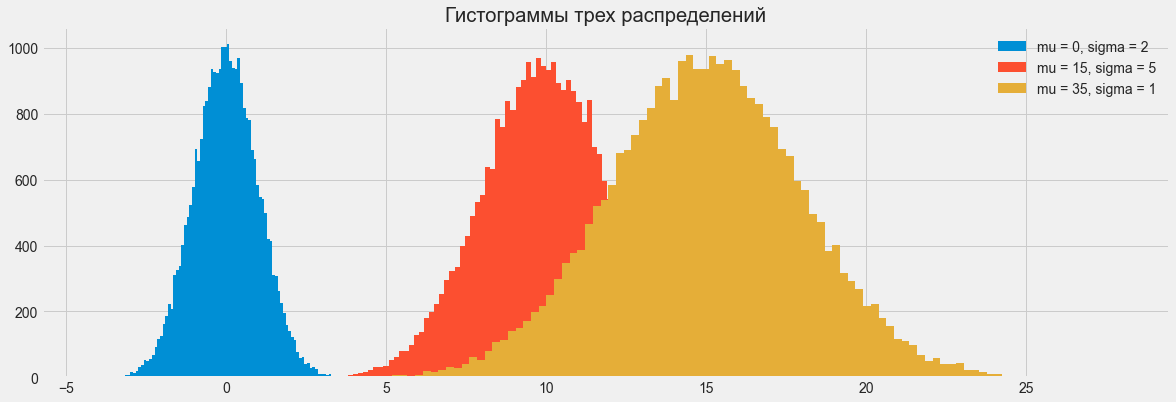

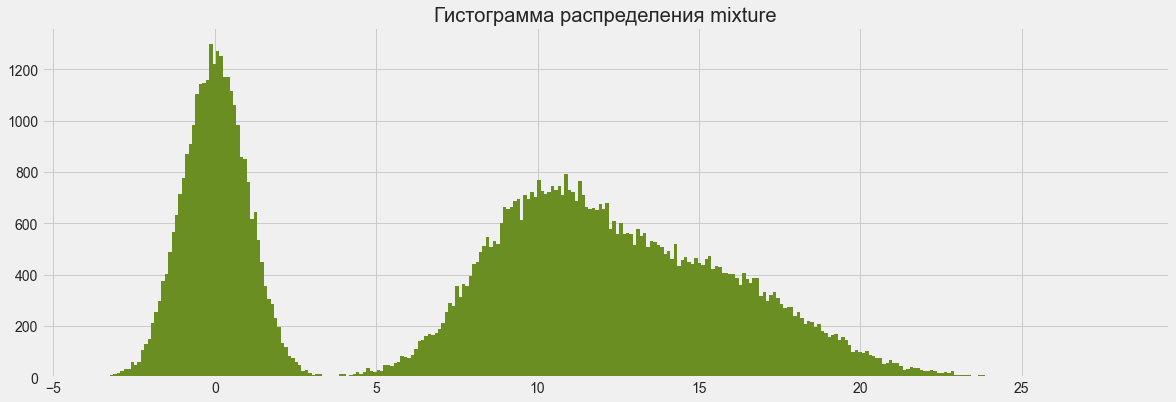

In [197]:
mu = np.array([
    0, 10, 15
])

sigma = np.array([
    1, 2, 3
])

n = 30000

plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 6))
plt.title('Гистограммы трех распределений')
for i in range(len(mu)):
    plt.hist(
        np.random.normal(mu[i], sigma[i], n),
        bins=100
    )
plt.legend([
    "mu = 0, sigma = 2",
    "mu = 15, sigma = 5",
    "mu = 35, sigma = 1"
])
plt.show()

plt.figure(figsize=(18, 6))
plt.title('Гистограмма распределения mixture')
plt.hist(create_mixture(mu, sigma, n), bins=300, color='olivedrab')
plt.show()

**Пункт 3.** Гермиона помнит формулы шагов EM-алгоритма только для случая $k = 2$, что ограничивает проведение исследования. Выведите формулы шагов EM-алгоритма для разделения смеси $k$ нормальных распределений. Запишите основные шаги вывода формул и финальный результат в ячейке Markdown ниже.

**E.1-шаг.**

$$
P(z_i = j | x_i, \theta_{old}) = \dfrac{p(z_i = j, x_i | \theta_{old})}{f(x_i | \theta_{old})}  = \dfrac{f(x_i | z_i = j, \theta_{old})p_j}{p_1f(x_i | z_i = 1, \theta_{old}) + p_2f(x_i | z_i = 2, \theta_{old}) + \dotsc + p_kf(x_i | z_i = k, \theta_{old})}
$$



**E.2-шаг.**

$$
Q(\theta, \theta_{old}) = \sum_i P(z_i = 1 | x, \theta_{old})[\ln f(x_i | \theta) + \ln p_1] + \dotsc + P(z_i = k | x, \theta_{old})[\ln f(x_i | \theta) + \ln p_k].
$$

**M-шаг.**

$$
Q'_{\mu_j} = \sum_i P(z_i = j | x, \theta_{old}) \dfrac{(x_i - \mu_j)}{\sigma_j^2}
$$

$$
\mu_j^{new} = \dfrac{\sum_i P(z_i = j | x, \theta_{old}) x_i}{\sum_i P(z_i = j | x, \theta_{old})}
$$

$$
Q'_{\sigma_j^2} = \sum_i P(z_i = j | x, \theta_{old}) (-\dfrac{1}{2\sigma^2_j} + \dfrac{1}{2}\dfrac{(x_i - \mu_j)^2}{\sigma_j^4})
$$

$$
\sigma_j^{2, new} = \dfrac{\sum_i (x_i - \mu)^2 P(z_i = 1 | x, \theta_{old})}{\sum_i P(z_i = 1 | x, \theta_{old})}
$$

$$
Q'_{p_j} = \sum_i P(z_i = j | x, \theta_{old}) \dfrac{1}{p_j} - (1 - P(z_i = j | x, \theta_{old})) \dfrac{1}{1 - p_j}
$$

$$
p_j^{new} = \dfrac{\sum_i P(z_i = j | x, \theta_{old})}{n}
$$

**Пункт 4.** Реализуйте EM-алгоритм для разделения смеси нормальных распределений в виде функции `EM(mixture, k, theta)`. На вход эта функция принимает вектор `x`, содержащий смесь нормальных распределений, число предполагаемых кластеров `k` и вектор изначальных предположений о параметрах распределений и вероятностях принадлежности к соответствующим кластерам `theta`. Функция должна возвращать кортеж `(theta_new, Q_history)`, содержащий вектор параметров `theta_new`, полученный после работы EM-алгоритма, и историю обновлений функции M-шага $Q$.

In [198]:
### Много чего взято с сема!
def f(x, mu, sigma2):
    return 1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-1/2 * 1/sigma2 * (x - mu)**2)

In [199]:
# Логарифм функции плотности x
def lnf(x, mu, sigma2):
    return -1/2 * np.log(2 * np.pi * sigma2) - 1/2 * (x - mu) ** 2 / sigma2

In [200]:
def Q_f(x, theta, p_z):
    answer = 0
    for i in range(p_z.shape[0]):
        answer += (lnf(x, theta[i*3], theta[i*3 + 1]) + np.log(theta[i*3 + 2])) * p_z[i]
    return np.sum(answer)

In [211]:
def EM(mixture, k, theta1, typeal=1):
    '''
    mixture: ndarray
        ndarray containing the mixture of normal distributions
    k: int
        supposed number of clusters
    theta: ndarray
        ndarray containing the initial parameters for each distribution and unconditional probabilities for each 
        cluster
    '''
    Q_history = []
    theta = np.copy(theta1)
    for i in range(100):
        
        # E-step
        p_z = np.zeros((k, mixture.shape[0]))
        p_z_s = 0
        for j in range(k):
            p_z_s += theta[j*3 + 2] * f(mixture, mu = theta[j*3], sigma2 = theta[j*3 + 1])
            
        for j in range(k):
            p_z[j] = f(mixture, mu = theta[j * 3], sigma2 = theta[j * 3 + 1]) * theta[j * 3 + 2] / p_z_s

        if (typeal==1):
            Q_history.append(Q_f(mixture, theta, p_z))
            if i > 0:
                if (Q_history[i] - Q_history[i-1])**2 < 1e-4:
                    break

        # M-step
        for j in range(k):
            mu_j = np.sum(p_z[j] * mixture) / np.sum(p_z[j])
            sigjma2_j = np.sum((mixture - mu_j) ** 2 * p_z[j])/ np.sum(p_z[j])
            p_j = np.sum(p_z[j]) / len(mixture)
            if np.any(np.isnan([mu_j, sigjma2_j, p_j])):
                break
            theta[j*3] = mu_j
            theta[j*3+1] = sigjma2_j 
            theta[j*3+2] = p_j
        if (typeal==2):
            Q_history.append(Q_f(mixture, theta, p_z))
            if i > 0:
                if (Q_history[i] - Q_history[i-1])**2 < 1e-4:
                    break
    return (theta, Q_history)

**Пункт 5.** Используйте сгенерированную в Пункте 2 смесь, чтобы протестировать работу EM-алгоритма. Задайте вектор `theta` каким-нибудь разумным образом, но так, чтобы изначальные параметры не совпадали с истинными, которые вы использовали для генерации смеси (Гарри считает это нарушением чистоты эксперимента). Параметр `k` укажите равным 3.

### Истинные параметры

In [212]:
print(tabulate([
    (mu[0], sigma[0] ** 2, 1/3),
    (mu[1], sigma[1] ** 2, 1/3),
    (mu[2], sigma[2] ** 2, 1/3)
], headers = ['true mu', 'true sigma^2', 'true p'], tablefmt="grid"
))

+-----------+----------------+----------+
|   true mu |   true sigma^2 |   true p |
+===========+================+==========+
|         0 |              1 | 0.333333 |
+-----------+----------------+----------+
|        10 |              4 | 0.333333 |
+-----------+----------------+----------+
|        15 |              9 | 0.333333 |
+-----------+----------------+----------+


### Начальные параметры (инициализируем ЕМ алгоритм с помощью данной theta

In [213]:
n=10000
x = create_mixture(mu, sigma, n)
theta = np.array(
    [np.min(x), (np.max(x) - np.min(x)) / 2, 1/2,
     np.median(x), (np.max(x) - np.min(x)) / 2, 1/4,
     np.max(x), (np.max(x) - np.min(x)) / 2, 1/4,
    ]
)
print(tabulate([
    theta[:3],
    theta[3:6],
    theta[6:]
], headers = ['init mu', 'init sigma^2', 'init p'], tablefmt="grid"
))

+-----------+----------------+----------+
|   init mu |   init sigma^2 |   init p |
+===========+================+==========+
|  -3.94217 |        15.8795 |     0.5  |
+-----------+----------------+----------+
|   9.81273 |        15.8795 |     0.25 |
+-----------+----------------+----------+
|  27.8169  |        15.8795 |     0.25 |
+-----------+----------------+----------+


### Оценка, полученная с помощью ЕМ алгоритма

In [214]:
theta_new, Q_history = EM(x, 3, theta)
print(tabulate([
    theta_new[:3],
    theta_new[3:6],
    theta_new[6:]
], headers = ['EM mu', 'EM sigma^2', 'EM p'], tablefmt="grid"
))

+-------------+--------------+----------+
|       EM mu |   EM sigma^2 |     EM p |
+=============+==============+==========+
|  0.00850319 |      1.00957 | 0.333082 |
+-------------+--------------+----------+
| 10.446      |      4.85691 | 0.419858 |
+-------------+--------------+----------+
| 15.9721     |      6.70089 | 0.24706  |
+-------------+--------------+----------+


## КАЕФ, получилось все супер близко)))))))))) 
## Алгоритм отлично работает!!!!!!!!! :)

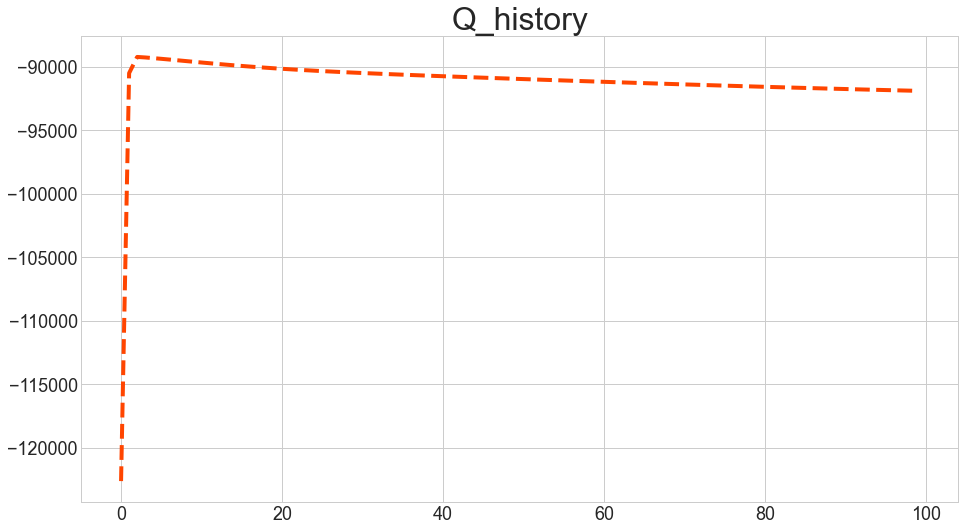

In [215]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(14, 8))
plt.title("Q_history", size=32)
plt.plot(np.arange(len(Q_history)), Q_history, color='orangered', linestyle='--')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

**Пункт 6.** Гермиона утверждает, что с теортической точки зрения функция $Q$ должна монотонно возрастать: на каждой итерации EM-алгоритма мы увеличиваем значение правдоподобия. "What do you think you know and how do you think you know it?" - отвечает Гарри и задаёт три своих вопроса:
1. О каком правдоподобии идёт речь: $p(X|\theta)$ или $p(X, Z | \theta)$?
2. Увеличивается или не уменьшается? 
3. Почему это утвержедение верно? 

Помогите Гермионе ответить на вопросы Гарри. Запишите ответы в ячейке Markdown ниже.

*Подсказка:* соответствующая цепочка неравенств была на одной из лекций.


**Лайфхак от Демешева Бориса Борисовича**

$$\ln(x | \theta) = KL(q || p{_z|x, \theta}) + LB(q, \theta)$$
Также мы знаем, что дивергенция кульбака-лейблера неотрицательна
$$KL \geq 0$$
И так как мы на **E-шаге** максимизиурем по $q$
$$ 
 q^{new} = \arg \max_q \; LB(q, \theta_{old})
$$


$$q^{new} = p(z | x, \theta)$$

А на **M-шаге** максимизируем по $\theta$ 
$$\theta^{new} = \arg \max_{\theta} \; LB(q^{new}, \theta) $$


Отсюда делаем вывод на неравенство.

$$
\ell(x | \theta_{old} =^{E-шаг} LB(q^{new}, \theta_{old}) \leq^{M-шаг} LB(q^{new}, \theta) \leq \ell(x | \theta_{new})
$$


Данны были взяты из конспекта лекций https://github.com/V-Marco/psmo_20_21/blob/master/lectures/5.pdf

**Пункт 7.** Разобравшись с предыдущим вопросом, Гермиона вспомнила, что она недавно [прочитала](https://stats.stackexchange.com/questions/341173/em-algorithm-seems-to-work-but-q-is-not-monotonic-possible-reasons), что при практической реализации EM-алгоритма динамика $Q$ зависит от того, на каком шаге обновляется история изменения $Q$. Постройте два графика с динамикой $Q$, подтверждающие слова Гермионы, и объясните, используя материалы по ссылке, почему Гермиона права. Используйте те же параметры, что и в Пункте 5.

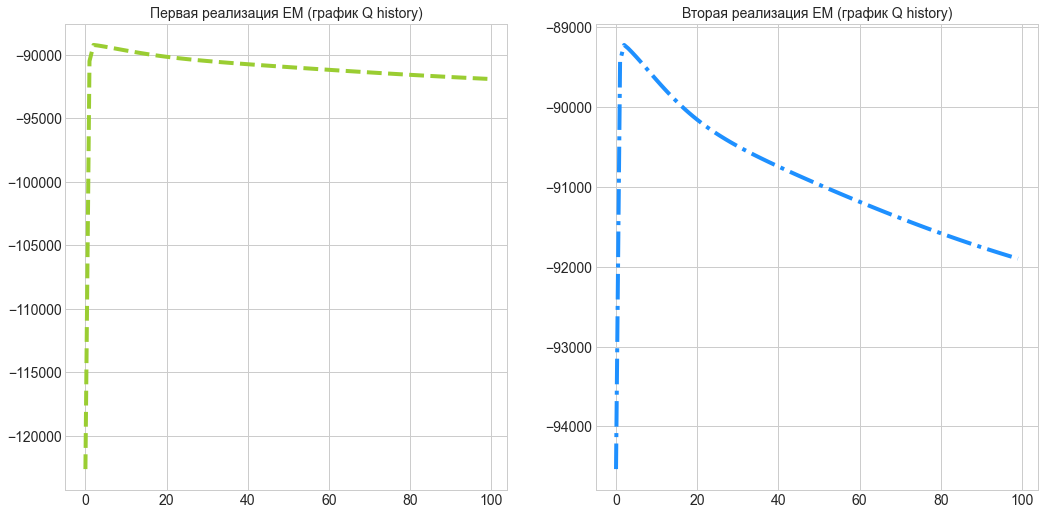

In [216]:
_, Q1 = EM(x, 3, theta, typeal=1) 
_, Q2 = EM(x, 3, theta, typeal=2) 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.title("Первая реализация ЕМ (график Q history)", size=14)
plt.plot(np.arange(len(Q1)), Q1, color='yellowgreen', linestyle='--')

plt.subplot(1, 3, 2)
plt.title("Вторая реализация ЕМ (график Q history)", size=14)
plt.plot(np.arange(len(Q2)), Q2, color='dodgerblue', linestyle='-.')
plt.show()

**Пункт 8.** Гарри хочет экспериментально проверить поведение EM-алгоритма при различных комбинациях параметров. Выберите какой-нибудь количественный способ оценить качество работы EM-алгоритма (подойдёт любое разумное обоснованное решение) и оцените качество работы для сетки параметров $k = (2, 5, 10)$, $n = (10, 100, 1000)$.
Для этого:
1. Сгенерируйте смесь распределений с нужным числом $k$ и $n$.
2. Запустите функцию `EM(...)` на этой смеси. Параметр `k` укажите равным тестируемому значению (то есть 2, 5 или 10). 

Вектор начальных параметров `theta` для каждого случая генерируйте на основе какой-либо разумной статистики (например, для дисперсий можно взять разность крайних значений вариационного ряда, делённую на два). Постройте графики зависимости качества работы EM-алгоритма от используемых параметров `n` и `k` (то есть всего 9 графиков) и прокомментируйте наблюдаемые зависимости.

**В общем, для нас супер страшно становится, когда оценка далека от истинного значения, то есть чем дальше, тем хуже непрямопорционально, а квадратично ХУЖЕ, поэтому логично взять MSE)**

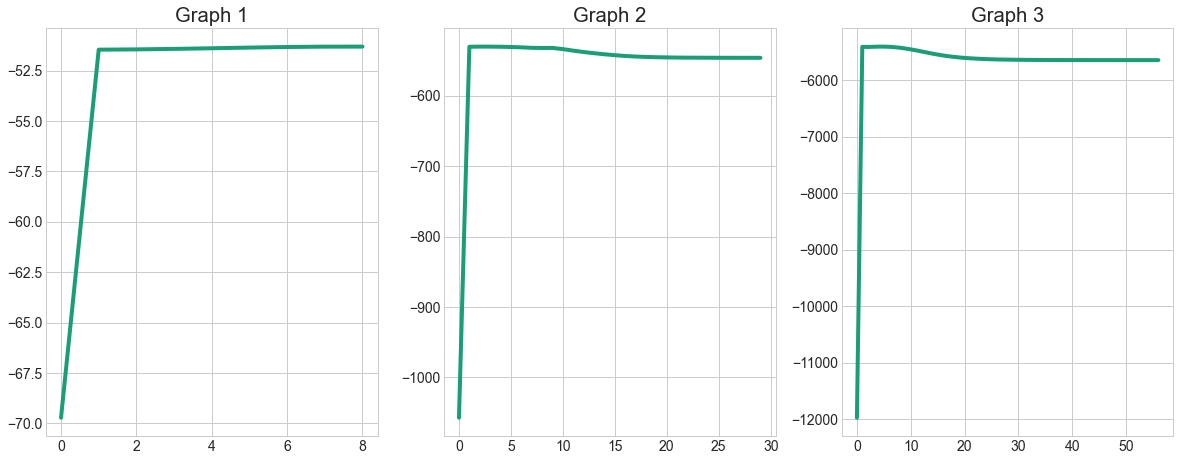

+---------+-----+------+-----------+
| Name    |   K |    N |       Mse |
+=========+=====+======+===========+
| Graph 1 |   2 |   10 |  0.330524 |
+---------+-----+------+-----------+
| Graph 2 |   2 |  100 | 26.6369   |
+---------+-----+------+-----------+
| Graph 3 |   2 | 1000 | 21.7291   |
+---------+-----+------+-----------+


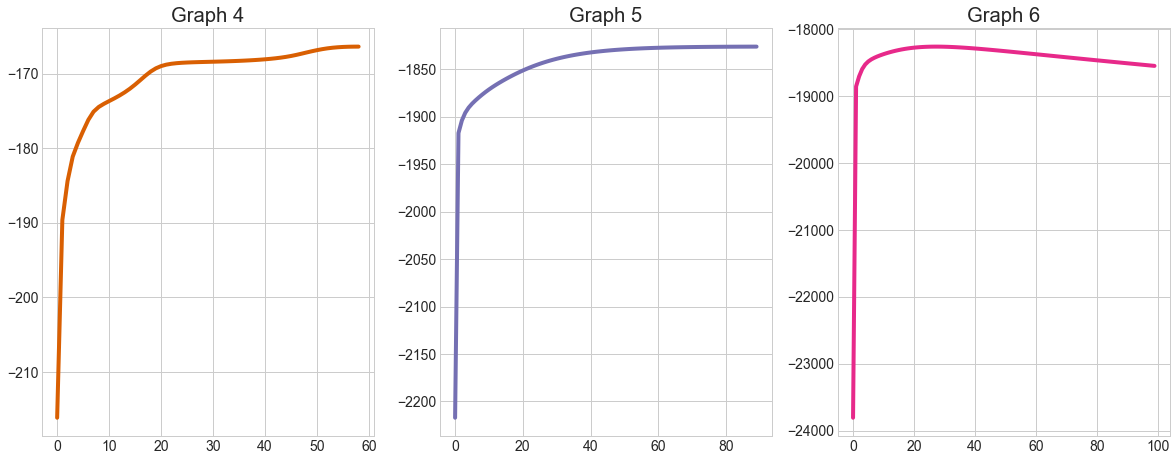

+---------+-----+------+----------+
| Name    |   K |    N |      Mse |
+=========+=====+======+==========+
| Graph 4 |   5 |   10 |  14.9128 |
+---------+-----+------+----------+
| Graph 5 |   5 |  100 |  43.5027 |
+---------+-----+------+----------+
| Graph 6 |   5 | 1000 | 107.881  |
+---------+-----+------+----------+


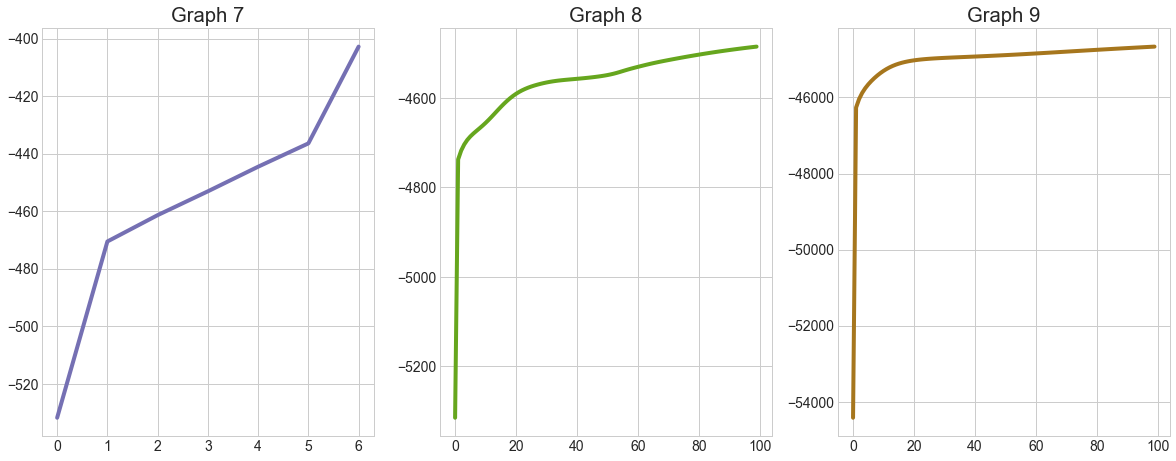

+---------+-----+------+----------+
| Name    |   K |    N |      Mse |
+=========+=====+======+==========+
| Graph 7 |  10 |   10 |  48.5838 |
+---------+-----+------+----------+
| Graph 8 |  10 |  100 |  70.3776 |
+---------+-----+------+----------+
| Graph 9 |  10 | 1000 | 100.953  |
+---------+-----+------+----------+


In [217]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import cm
from sklearn.metrics import mean_squared_error

cmap=cm.get_cmap("Dark2")(np.linspace(0, 1, 9))

k = [2, 5, 10]
n = [10, 100, 1000]
mu = [
    [0, 5],
    [0, 3, 6, 9, 12],
    [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
]

sigma = [
    [1, 4],
    [1, 3, 5, 7, 9],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
]

p = [
    [0.4, 0.6],
    [0.18, 0.22, 0.23, 0.17, 0.2],
    [0.08, 0.12, 0.1, 0.1, 0.1, 0.1, 0.06, 0.14, 0.07, 0.13]
]


for i in range(3):
    plt.figure(figsize=(18, 7))
    table = []
    for j in range(3):
        plt.subplot(1, 3, j + 1)
        x = create_mixture(np.array(mu[i]), np.array(sigma[i]), n[j])
        
        theta_true = np.zeros(3 * k[i])
        theta_true[::3] = np.array(mu[i])
        theta_true[1::3] = np.array(sigma[i])
        theta_true[2::3] = 1/k[i]
         
        theta = np.zeros(3 * k[i])
        theta[::3] = np.linspace(np.min(x), np.max(x), k[i])
        theta[1::3] = (np.max(x) - np.min(x)) / 2
        theta[2::3] = p[i]
        theta_new, Q = EM(x, k[i], theta)

        plt.plot(Q, color=cmap[i*j+i])
        plt.title("Graph " + str(i * 3 + j + 1))
        table.append(("Graph " + str(i * 3 + j + 1), k[i], n[j], mean_squared_error(theta_true, theta_new)))
    plt.show()
    print(tabulate(table, headers=['Name', "K", "N", "Mse"], tablefmt='grid'))

Начну с самых очевидных вещей.

1. Чем больше параметров, тем больше будет ошибка. Все очень просто больше слагаемых, больше разницы между истинными параметрами. Больше MSE
2. Почти всегда с ростом N уменьшается ошибка, но в какой-то момент, мы вроде как перестарались, переобучались, как в машинке, поэтому и MSE растет, в общем нужно уметь вовремя остановиться, иначе - беда.
3. В первом графике, такой низкий MSE, просто повезло)))))) Хорошо нарондомилось.


**Пункт 9.** После перебора разных значений `k` Гермионе стало интересно, что произойдёт, если поставить предполагаемое значение числа кластеров больше или меньше истинного. Проведите два эксперимента: выберите какое-нибудь небольшое значение $k$ и запустите EM-алгоритм с `k`, меньшим истинного, и `k`, большим истинного. Поясните полученные результаты.

В общем, должен получиться полный бред.

Мой алгоритм сломаетя, но сейчас я чуть-чуть подшаманю и попробую

Истинный параметр `k` = 4, запустим при `k` = 3 и `k` = 5

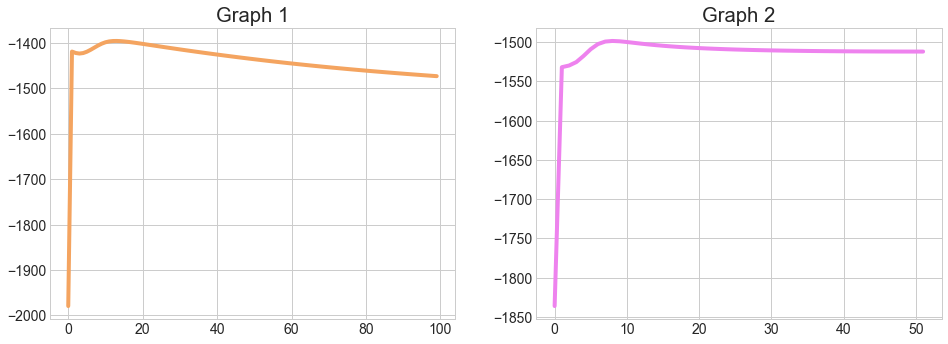

In [312]:
mu = [0, 4, 8, 12]
sigma = [1, 3, 6, 9]
n = 100
x = create_mixture(np.array(mu), np.array(sigma), n)
k = [3, 5]
colors = ['sandybrown', 'violet']
plt.figure(figsize=(22, 5))
ts = []
for i in range(2):
    plt.subplot(1, 3, i + 1)
    theta = np.zeros(3 * k[i])
    theta[::3] = np.linspace(np.min(x), np.max(x), k[i])
    theta[1::3] = (np.max(x) - np.min(x)) / 2
    theta[2::3] = 1/k[i]
    theta_new, Q = EM(x, k[i], theta)
    ts.append(theta_new)
    plt.plot(Q, color=colors[i])
    plt.title("Graph " + str(i + 1))
plt.show()

Честно говоря, я даже не знаю как нормально оценить качество, ибу тут даже MSE не заходит)

Посмотрю на распределения, если получится что-то похожее друг на дружку то прикольно, значит более менее работает.

Напишу ф-ую, которая по распредлению и вероятности её появление, строит выборку.
Просто буду из общего количества строить по долям, то есть есть у нас есть параметры $\mu = 0, \sigma = 1, p = 0.2$, а общее кол-во семплов == 200, то просто построим выборку из с такими параметрами.

In [313]:
def create_X(theta, n):
    X = np.array([], dtype=np.float)
    N = n * 4
    for i in range(0, theta.shape[0], 3):
        
        Y = np.random.normal(theta[i], theta[i + 1], round(N * theta[i + 2]))
        X = np.hstack([X, Y])
    return X

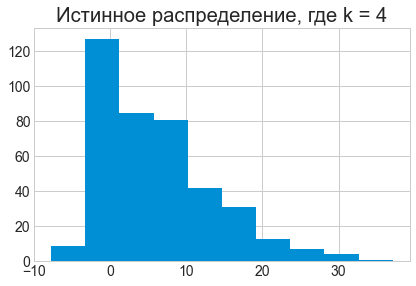

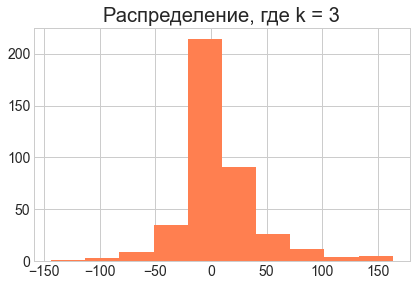

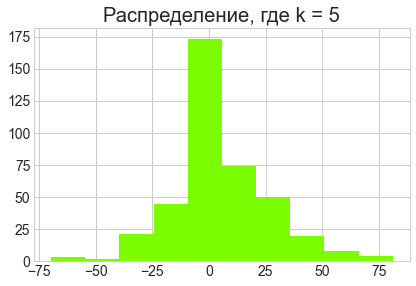

In [321]:
plt.hist(x)
plt.title("Истинное распределение, где k = 4")
plt.show()

plt.title("Распределение, где k = 3")
plt.hist(create_X(ts[0], 100), color='coral')
plt.show()

plt.title("Распределение, где k = 5")
plt.hist(create_X(ts[1], 100), color='lawngreen')
plt.show()

Возможно я слепой, но оч смутно вижу связь, можно, конечно обрадоваться, что больнинство элементов находятся от -25 до 25, как и в истинном распределении.

### Задача 2: "Cloudy, with a chance of..." (5 баллов).

В этой задаче нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. Формат задачи свободный: оцениваются любые разумные действия. В качестве зависимой переменной возьмём температуру воздуха (`temperature`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, регрессия может быть не значимой в целом), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные.

**Предобработка данных**. Загрузите данные и проведите любую предобработку, которую считаете нужной. Поясните свои действия.

**Построение объясняющей модели.**

**Пункт 1.** Выберите независимые переменные, которые будут включены в объясняющую модель. Поясните, почему выбор этих переменных разумен (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации).

**Пункт 2.** Изучите зависимости между зависимой и переменной и выбранными вами независимыми переменными. На основе проведённого анализа задайте функциональную форму модели. Например:

$$
\ln y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{1i}^2 + \beta_3\ln X_{3i} + u_i
$$

Запишите выбранный вид модели в ячейке Markdown ниже и прокомментируйте, почему он разумен (например, почему разумно взять не просто $X_1$, но ещё и его квадрат или взять не просто $y$, а его логарифм).

**Пункт 3.** Оцените выбранную модель при помощи МНК. Значима ли регрессия в целом? Если да, переходите к следующему пункту, если нет, то задайте другую функциональную форму модели.

**Пункт 4.** Прокомментируйте значимость отдельных коэффициентах в оценённой модели. Поясните, как каждый регрессор влияет на зависимую переменную математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что..."). Запишите ваши рассуждения в ячейку Markdown ниже.

**Пункт 5.** Есть ли в модели проблема мультиколлинеарности? Используйте как минимум два показателя (на ваш выбор), чтобы подтвердить ваш ответ. Если проблема обнаружена, скорректируйте её, или приведите обоснование, почему корректировка не требуется.

**Пункт 6.** Проведите как минимум три теста для идентификации гетероскедастичности. Если гетероскедастичность обнаружена, скорректируйте доверительные интервалы для коэффициентов каким-нибудь способом. Изменилась ли значимость каких-либо коэффициентов?

**Пункт 7.** Проведите какой-нибудь тест для идентификации эндогенности. Если эндогенность обнаружена, скорректируйте её каким-нибудь способом.

**Пункт 8.** Если после проведённых корректировок интерпретация каких-либо параметров модели изменилась, приведите новую интерпретацию. Сделайте финальный вывод о том, какие факторы влияют на температуру воздуха.

**Построение предиктивной модели.**

Воспользуйтесь вашими знаниями из машинного обучения и постройте хорошую предиктивную линейную регрессионную модель для предсказания температуры воздуха. Используйте MAE для выбора лучшей модели. 

**Сравнение объясняющей и предиктивной моделей.**

**Пункт 1.** Является ли предиктивная модель значимой в целом? Что можно сказать о значимости отдельных коэффициентов? 

**Пункт 2.** Как различаются регрессоры объясняющей и предиктивной моделей? Есть ли такие регрессоры, которые вошли в одну, но не вошли в другую. Если да, приведите возможную содержательную интерпретацию этого явления.

**Пункт 3.** На основе предыдущего анализа, сделайте вывод, можно ли использовать объясняющую модель для предсказания, а предиктивную -- для объяснений. Если да, то сравните предсказательную и объяснительную силу этих моделей на основе каких-нибудь метрик.